# Assignment 3 - SIT720 Machine Learning

In [29]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.linear_model import Lasso, Ridge, LinearRegression, SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [30]:
file = 'yeast2vs4.csv'
data = pd.read_csv(file)

In [31]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

## Section 1

### Question 1

What are the differences between hyperparameter and parameter of a machine learning (ML) model.
Explain your answer using at least two machine learning models that you have learned in this unit.

Model *Hyperparameters* are specified to control the learning process, these can be set before the training process of the model manually.
These parameters are independent of the dataset.
Some examples of Hyperparameters are the learning rate for training Neural Network, or hyperparameter K in K-Nearest Neighbor algorithm.

While *parameters* are the internal configuration of the model, they depend on the given dataset for training.
These parameters can be calculated by optimization algorithms, for example ADAM, Gradient Descent, etc.
The final parameters after the training process would decide the performance of the model on unseen data.
Some examples of model parameters are 'Weights' in Artificial Neural Network, Coefficients in Linear Regression or Support vectors in Support Vector Machine

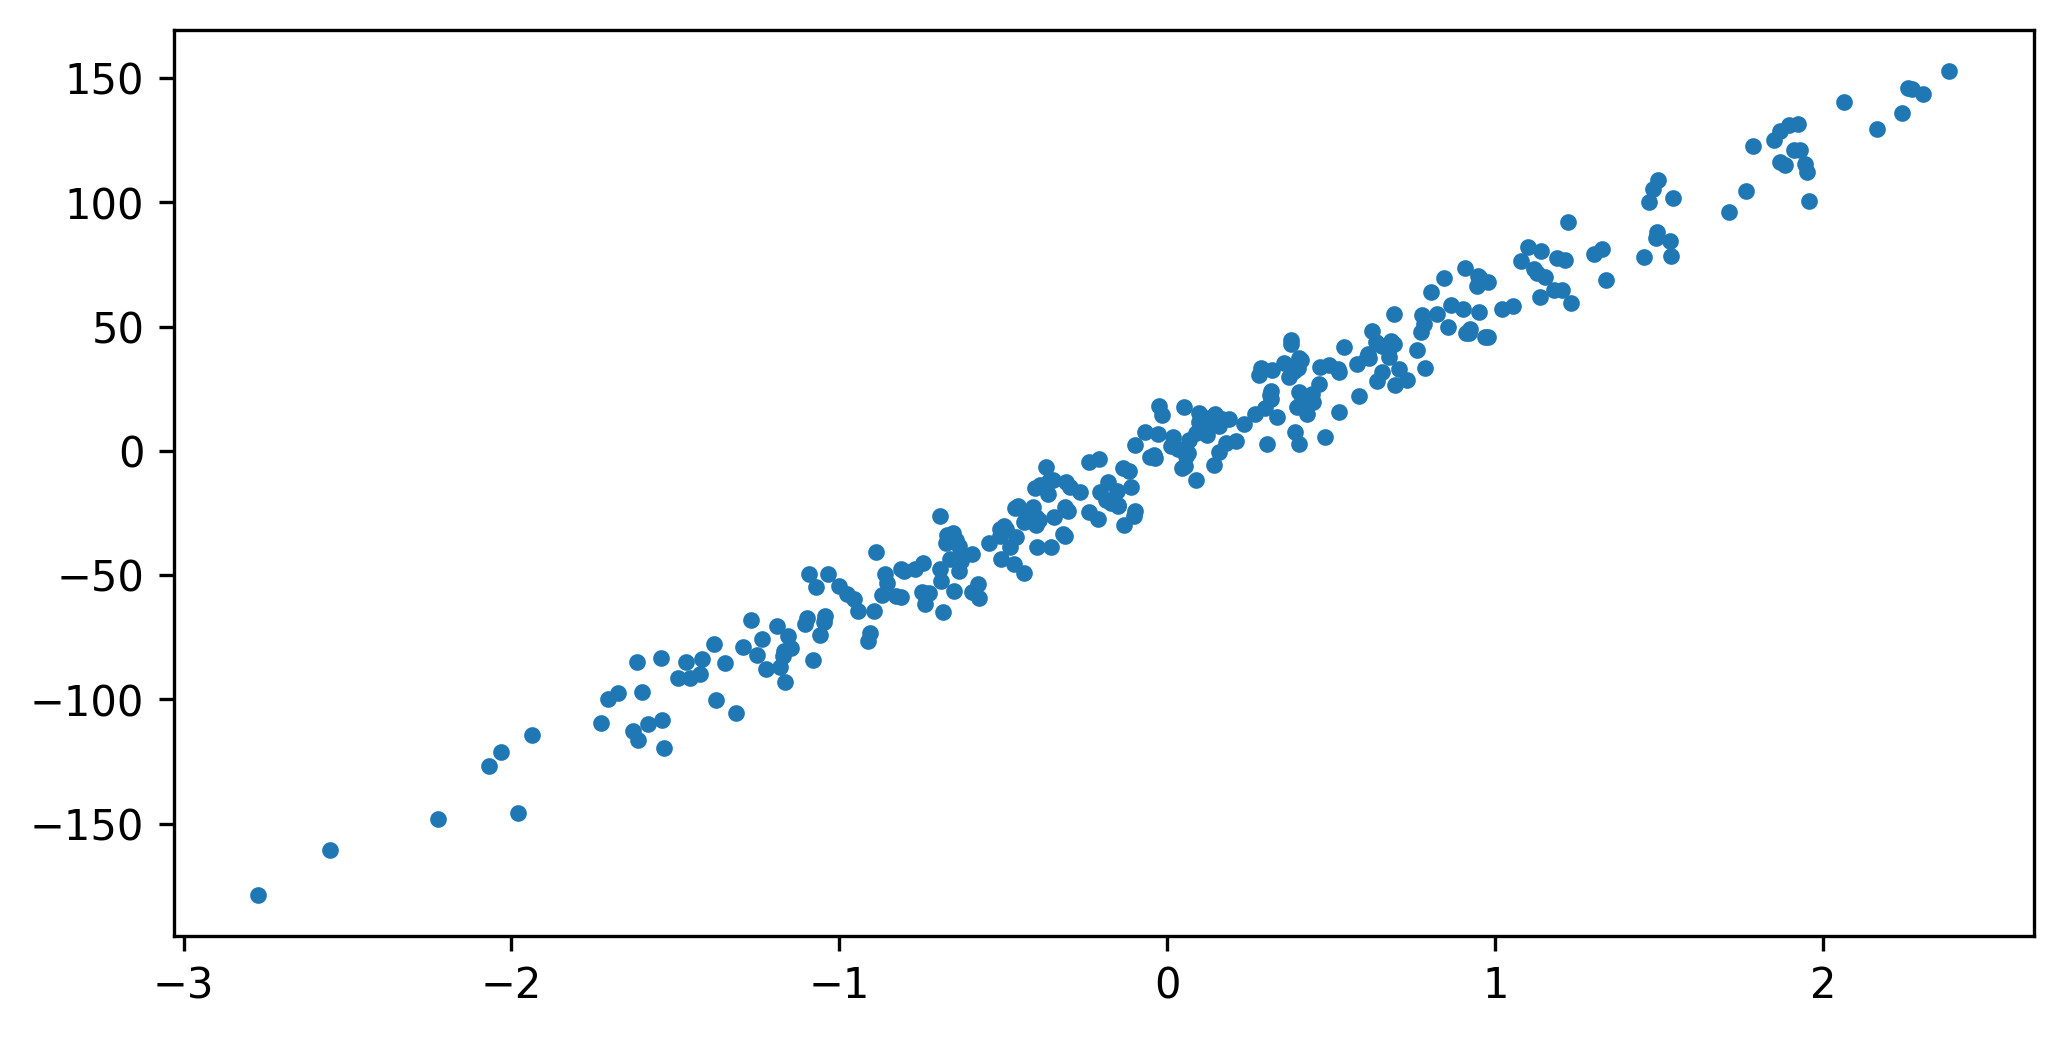

In [32]:
# Prepare with dummy data
from sklearn import datasets

plt.figure(figsize=(8, 4), dpi=300)

X, Y, coef = datasets.make_regression(
    n_samples=300, 
    n_features=1, 
    n_informative=10, 
    noise=10, 
    coef=True, 
    random_state=0
    )

plt.plot(X, Y, '.')
plt.show()

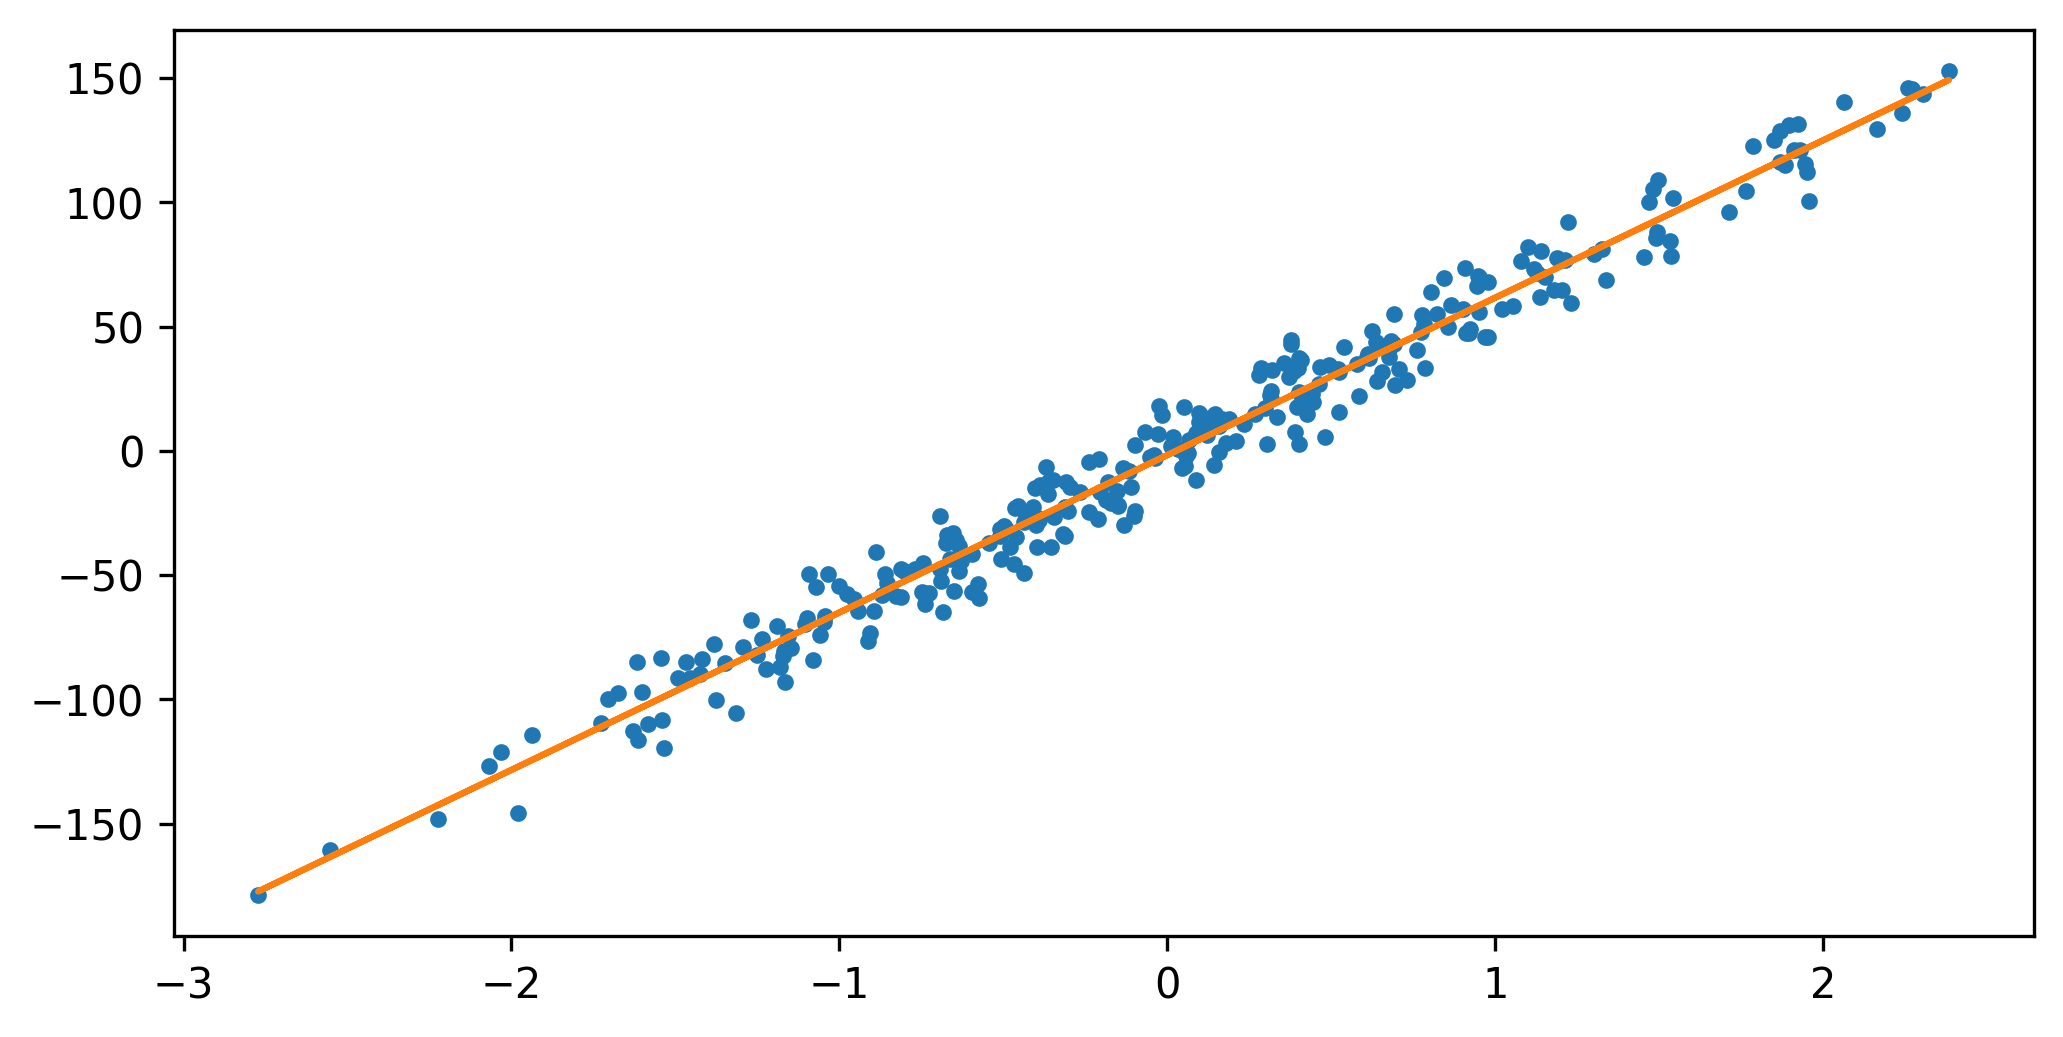

Model Coeff: [63.35182018]


In [33]:
# Example 1: Lasso regression
# Hyperparameter: alpha and max_iter
# parameter: coef_

lassoreg = Lasso(alpha=0.1, max_iter=100)

lassoreg.fit(X,Y)

Y_pred_example = lassoreg.predict(X)

plt.figure(figsize=(8, 4), dpi=300)
plt.plot(X, Y, '.')
plt.plot(X , Y_pred_example, '-')
plt.show()

print(f'Model Coeff: {lassoreg.coef_}')

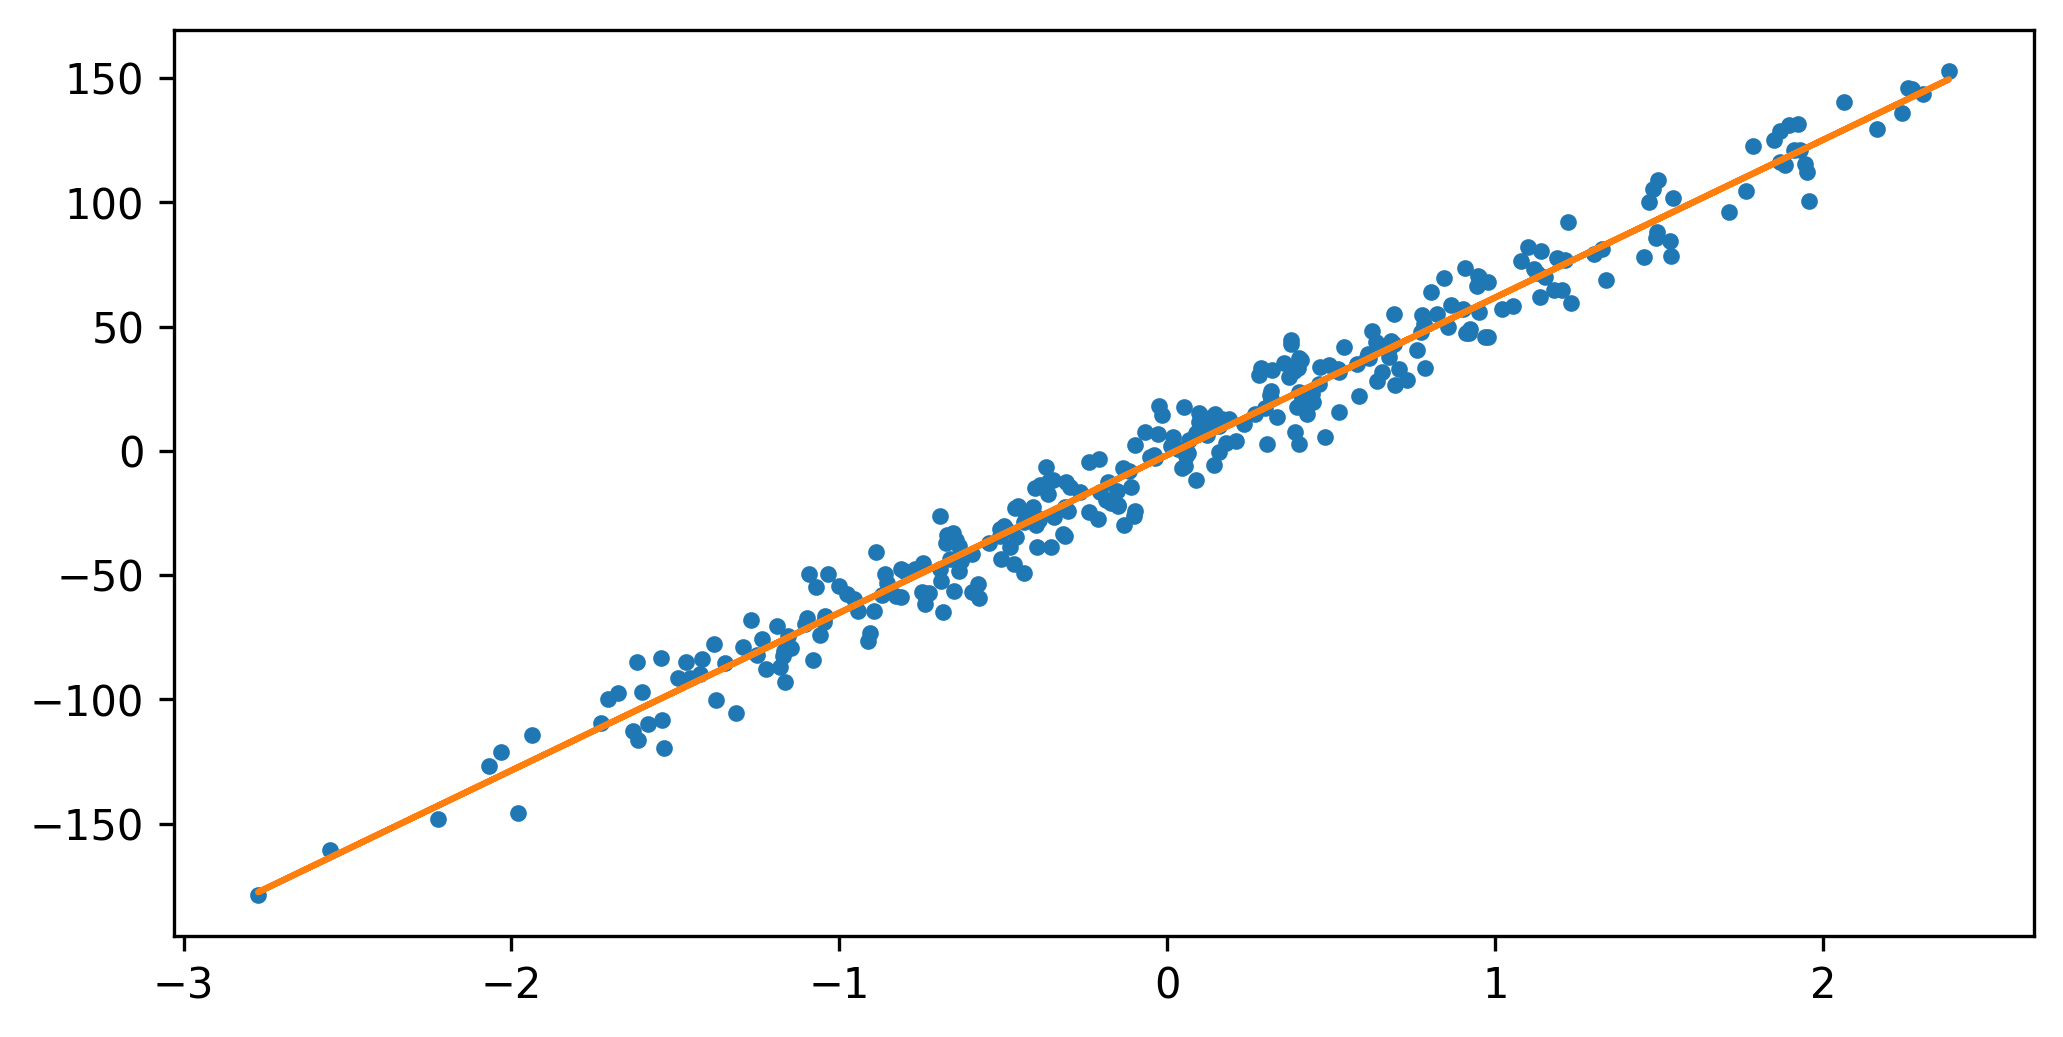

Model Coeff: [63.45104644]


In [34]:
# Example 2: Ridge regression
# Hyperparameter: alpha
# Parameter: coef_

ridgelr = Ridge(alpha=0.003)

ridgelr.fit(X,Y)

Y_pred_example_2 = ridgelr.predict(X)

plt.figure(figsize=(8, 4), dpi=300)
plt.plot(X, Y, '.', X , Y_pred_example_2, '-')
plt.show()

print(f'Model Coeff: {ridgelr.coef_}')

### Question 2
Prove that Elastic net can be used as either LASSO or Ridge regulariser.

*Elastic net* is a linear regression model trained with both $\ell_1$ and $\ell_2$ regularization of the coefficients.
$\ell_1$ regularization penalizes the sum of absolute weitghts, which used for *Lasso* regression model.
$\ell_2$ regularization penalizes the sum of square of the weights, which used in *Ridge* regression.
Thus Elastic net can be used as either Lasso or Ridge, because it has both of their properties.

## Section 2

**Background**

The recently started human and other genome projects are likely to change the situation of molecular biology.
Comprehensive analyses of whole genomic sequences will enable us to understand the general mechanisms of how protein and nucleic acid functions are encoded in the sequence data.

**Dataset filename:** yeast2vs4.csv

**Dataset description:** There are 8 features and one target in the dataset. All the features are in a numerical format, and the target is in text format. 
For further information about the attributes, please read “Data Set Information.pdf”.


**Note**

N. B. Question 5 is a HD (High Distinction) level question. Those students who target HD grade should answer this question (including answering all the above questions). 
For others, this question is an option. 
This question aims to demonstrate your expertise in the subject area and the ability to do your own research in the related area.

### Question 3
Analyse the importance of the features for predicting presence or absence of protein using two different approaches. 
Explain the similarity/difference between outcomes.

In [35]:
data['class'] = data['class'].replace(['negative', 'positive'], [-1, 1])
data.head()

,mcg,gvh,alm,mit,erl,pox,vac,nuc,class
0,0.51,0.40,0.56,0.17,0.5,0.5,0.49,0.22,-1
1,0.40,0.39,0.60,0.15,0.5,0.0,0.58,0.30,-1
2,0.40,0.42,0.57,0.35,0.5,0.0,0.53,0.25,-1
3,0.46,0.44,0.52,0.11,0.5,0.0,0.50,0.22,-1
4,0.47,0.39,0.50,0.11,0.5,0.0,0.49,0.40,-1


In [36]:
predictors = data.columns[:-1]
response = ['class']
Dtrain, Dtest =  train_test_split(data, test_size=0.3, random_state=0)
print(f'Train size: {len(Dtrain)}')
print(f'Test size: {len(Dtest)}')

Train size: 359
Test size: 155


In [37]:
etree = ExtraTreesClassifier()
etree.fit(Dtrain[predictors], Dtrain[response].values.reshape((Dtrain[response].shape[0],)))
etree_y_predict = etree.predict(Dtest[predictors])

dtree_acc = accuracy_score(etree_y_predict, Dtest[response])
print(f'Accuracy: {dtree_acc}')

feature_importances_etree = np.mean([
    tree.feature_importances_ for tree in etree.estimators_
], axis=0)

f_i_etree = {fn: fi for fn, fi in zip(data.columns, feature_importances_etree)}

print(f'Feature importances: {f_i_etree}')

Accuracy: 0.9548387096774194
Feature importances: {'mcg': 0.3301404945589791, 'gvh': 0.14168000706866918, 'alm': 0.33418683147858497, 'mit': 0.08539124259428121, 'erl': 0.008352948535219529, 'pox': 6.0569669992049554e-05, 'vac': 0.06099725546747173, 'nuc': 0.03919065062680239}


In [38]:
rfc = RandomForestClassifier()
rfc.fit(Dtrain[predictors], Dtrain[response].values.reshape((Dtrain[response].shape[0],)))
rfc_y_predict = rfc.predict(Dtest[predictors])

rfc_acc = accuracy_score(rfc_y_predict, Dtest[response])
print(f'Accuracy: {rfc_acc}')

feature_importances_rfc = np.mean([
    tree.feature_importances_ for tree in rfc.estimators_
], axis=0)

f_i_rfc = {fn: fi for fn, fi in zip(data.columns, feature_importances_rfc)}

print(f'Feature importances: {f_i_rfc}')

Accuracy: 0.9612903225806452
Feature importances: {'mcg': 0.3165152403041572, 'gvh': 0.13745135172123507, 'alm': 0.377138474487557, 'mit': 0.07538835365334502, 'erl': 0.007966610594550774, 'pox': 1.4669400300852914e-06, 'vac': 0.05548619489133344, 'nuc': 0.030052307407791207}


<Figure size 2400x1200 with 0 Axes>

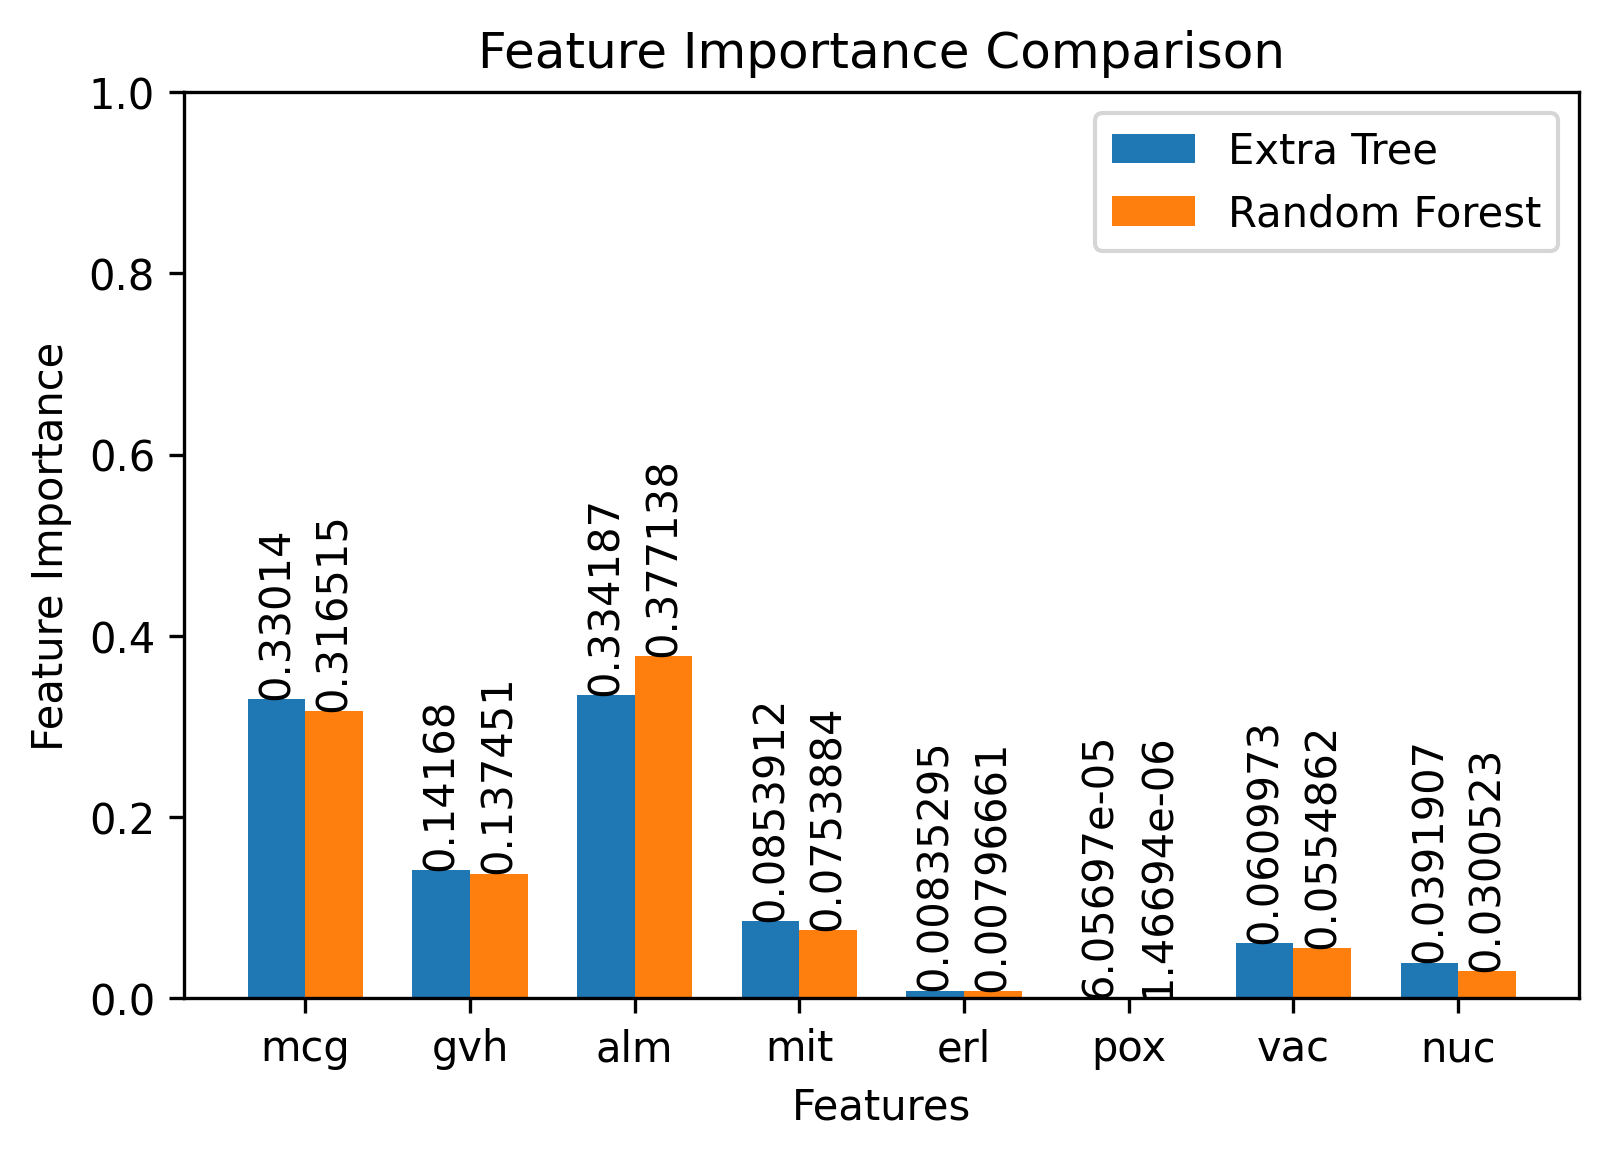

In [39]:
x = np.arange(len(predictors))  # the label locations
width = 0.35                    # the width of the bars

plt.figure(figsize=(8, 4), dpi=300)

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, list(f_i_etree.values()), width, label='Extra Tree')
rects2 = ax.bar(x + width/2, list(f_i_rfc.values()), width, label='Random Forest')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Feature Importance')
ax.set_xlabel('Features')
ax.set_title('Feature Importance Comparison')
ax.bar_label(rects1, rotation = 90)
ax.bar_label(rects2, rotation = 90)
ax.set_xticks(x)
ax.set_xticklabels(predictors)
ax.set_ylim(top = 1)
ax.legend()

plt.show()

`alm` is the most impactful feature that decide the outcome of both modes.
While `pox` is the feature that seems to be the irrelevant factor in both models

### Question 4
Create three supervised machine learning (ML) models except any ensemble approach for predicting presence or absence of protein.
1. Report performance score using a suitable metric. 
   Is it possible that the presented result is an overfitted one? Justify.
2. Justify different design decisions for each ML model used to answer this question.
3. Have you optimised any hyper-parameters for each ML model? 
   What are they? Why have you done that? Explain.
4. Finally, make a recommendation based on the reported results and justify it.

Overfit means that the model has memorized the training data instead of learning the relationships between features and labels.
If "Accuracy" (measured against the training set) is very good and "Validation Accuracy" (measured against a validation set) is not as good, then the model is overfitting.

Underfitting is the opposite, wherein the model exhibits high bias.
Them model is not sufficiently complex to capture the relationship between features and labels.
If Accuracy and Validation Accuracy are similar but are both poor, then the model may be underfitting.

In [40]:
sgd = SGDClassifier()
sgd.fit(Dtrain[predictors], Dtrain[response].values.reshape((Dtrain[response].shape[0],)))
sgd_y_predict = sgd.predict(Dtrain[predictors])
sgd_y_predict_val = sgd.predict(Dtest[predictors])

sgd_acc = accuracy_score(sgd_y_predict, Dtrain[response])
sgd_acc_val = accuracy_score(sgd_y_predict_val, Dtest[response])
print(f'Accuracy: {sgd_acc}')
print(f'Validation Accuracy: {sgd_acc_val}')

Accuracy: 0.9220055710306406
Validation Accuracy: 0.9354838709677419


In [41]:
knn = KNeighborsClassifier()
knn.fit(Dtrain[predictors], Dtrain[response].values.reshape((Dtrain[response].shape[0],)))
knn_y_predict = knn.predict(Dtrain[predictors])
knn_y_predict_val = knn.predict(Dtest[predictors])

knn_acc = accuracy_score(knn_y_predict, Dtrain[response])
knn_acc_val = accuracy_score(knn_y_predict_val, Dtest[response])
print(f'Accuracy: {knn_acc}')
print(f'Validation Accuracy: {knn_acc_val}')

Accuracy: 0.9693593314763231
Validation Accuracy: 0.9612903225806452


In [42]:
svm_model = svm.SVC()
svm_model.fit(Dtrain[predictors], Dtrain[response].values.reshape((Dtrain[response].shape[0],)))
svm_y_pred = svm_model.predict(Dtrain[predictors])
svm_y_pred_val = svm_model.predict(Dtest[predictors])

svm_acc = accuracy_score(svm_y_pred, Dtrain[response])
svm_acc_val = accuracy_score(svm_y_pred_val, Dtest[response])
print(f'Accuracy: {svm_acc}')
print(f'Validation Accuracy: {svm_acc_val}')

Accuracy: 0.9665738161559888
Validation Accuracy: 0.9548387096774194


<Figure size 2400x1200 with 0 Axes>

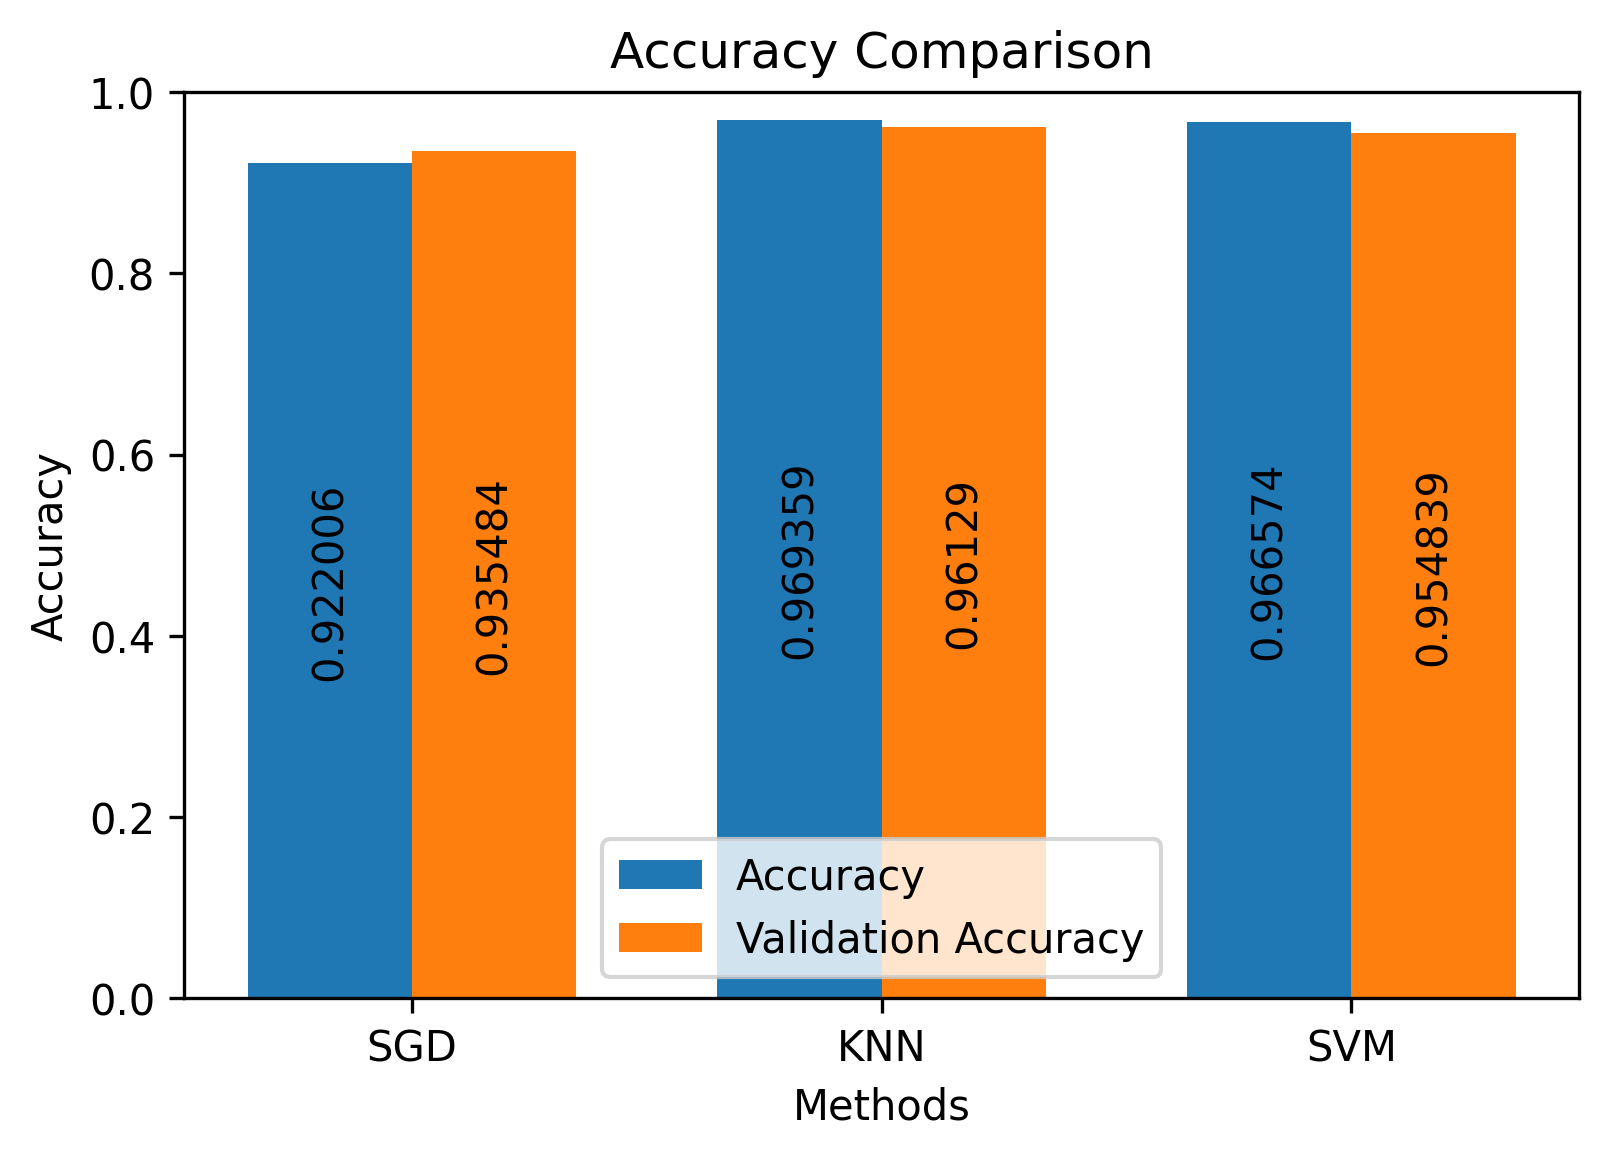

In [43]:
acc = [sgd_acc, knn_acc, svm_acc]
acc_val = [sgd_acc_val, knn_acc_val, svm_acc_val]

labels = ['SGD', 'KNN', 'SVM']

x = np.arange(len(acc))  # the label locations
width = 0.35             # the width of the bars

plt.figure(figsize=(8, 4), dpi=300)

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, acc, width, label='Accuracy')
rects2 = ax.bar(x + width/2, acc_val, width, label='Validation Accuracy')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_xlabel('Methods')
ax.set_title('Accuracy Comparison')
ax.bar_label(rects1, rotation = 90, label_type='center')
ax.bar_label(rects2, rotation = 90, label_type='center')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(top = 1)
ax.legend( loc='best')

plt.show()

In [44]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score

sgd_cm = confusion_matrix(Dtest[response], sgd_y_predict_val)
sgd_pre = precision_score(Dtest[response], sgd_y_predict_val)
sgd_rec = recall_score(Dtest[response], sgd_y_predict_val)
sgd_f1 = f1_score(Dtest[response], sgd_y_predict_val)

knn_cm = confusion_matrix(Dtest[response], knn_y_predict_val)
knn_pre = precision_score(Dtest[response], knn_y_predict_val)
knn_rec = recall_score(Dtest[response], knn_y_predict_val)
knn_f1 = f1_score(Dtest[response], knn_y_predict_val)

svm_cm = confusion_matrix(Dtest[response], svm_y_pred_val)
svm_pre = precision_score(Dtest[response], svm_y_pred_val)
svm_rec = recall_score(Dtest[response], svm_y_pred_val)
svm_f1 = f1_score(Dtest[response], svm_y_pred_val)


<Figure size 2400x1200 with 0 Axes>

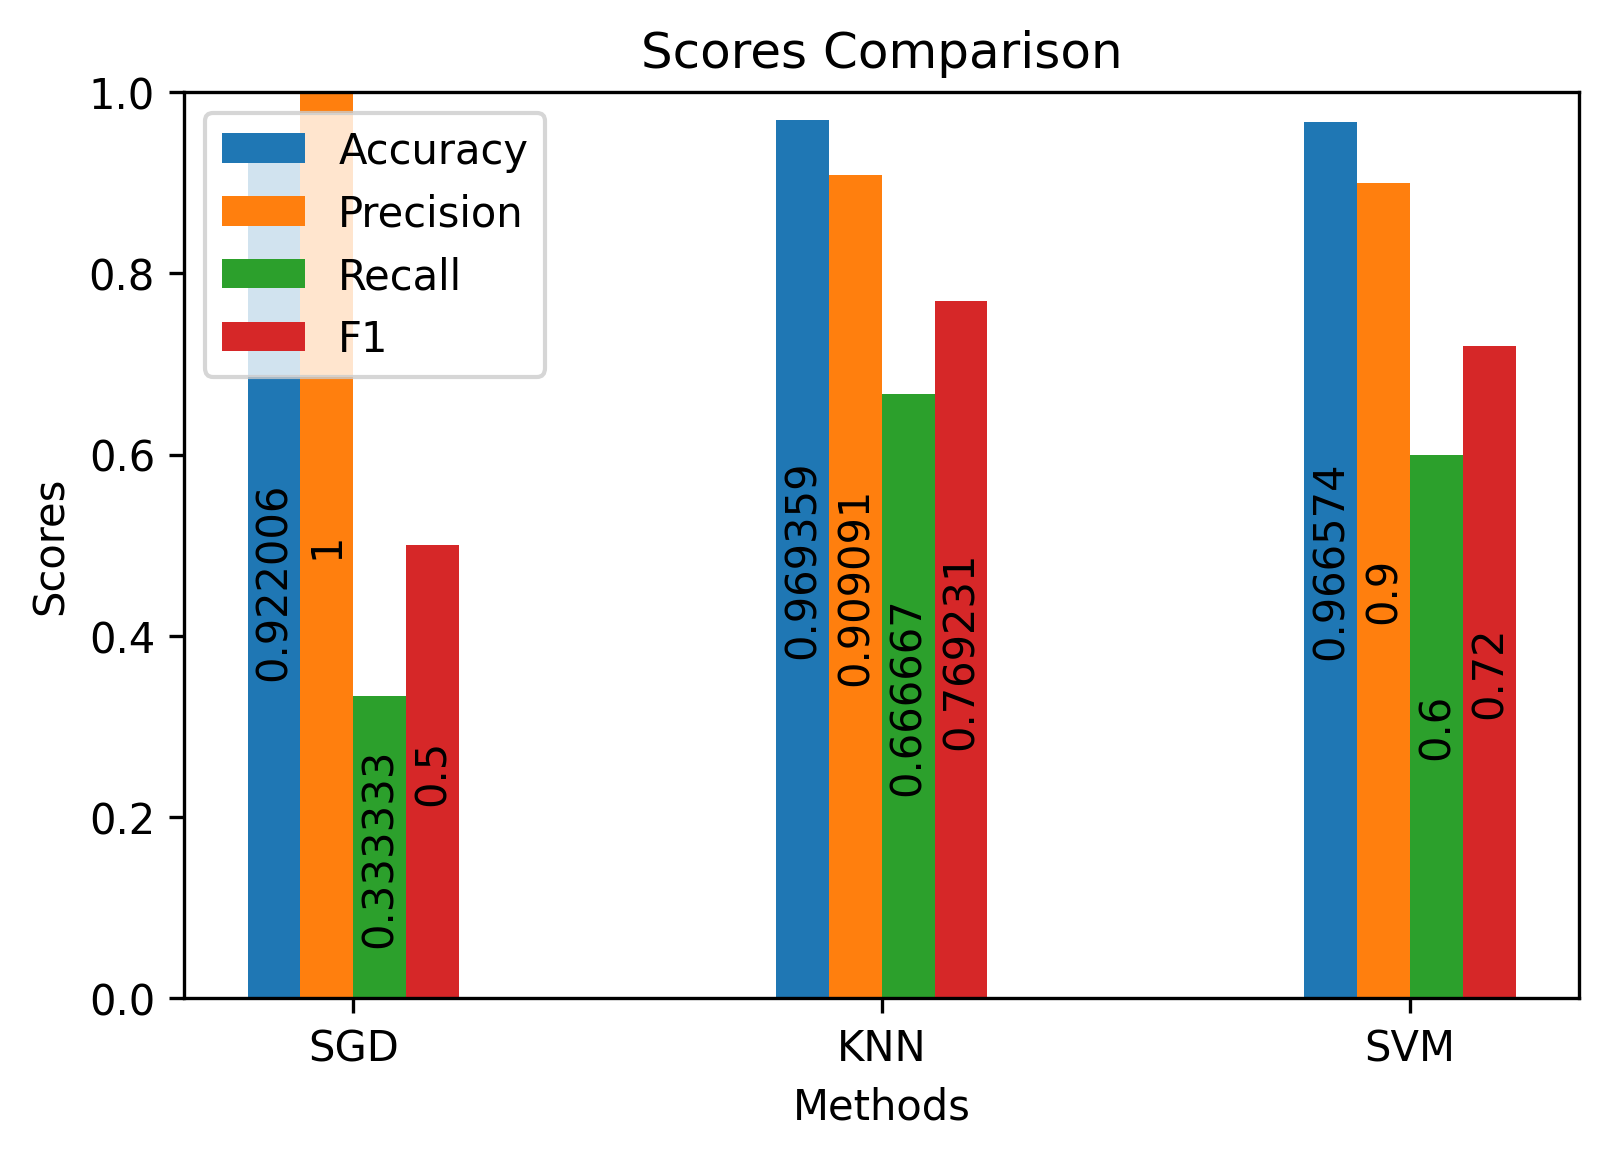

In [45]:
acc = [sgd_acc, knn_acc, svm_acc]
pre = [sgd_pre, knn_pre, svm_pre]
rec = [sgd_rec, knn_rec, svm_rec]
f1 = [sgd_f1, knn_f1, svm_f1]


labels = ['SGD', 'KNN', 'SVM']

x = np.arange(len(acc))  # the label locations
width = 0.1           # the width of the bars
plt.figure(figsize=(8, 4), dpi=300)
fig, ax = plt.subplots()
rects1 = ax.bar(x - 1.5* width, acc, width, label='Accuracy')
rects2 = ax.bar(x- width/2, pre, width, label='Precision')
rects3 = ax.bar(x + width/2, rec, width, label='Recall')
rects4 = ax.bar(x + 1.5*width, f1, width, label='F1')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_xlabel('Methods')
ax.set_title('Scores Comparison')
ax.bar_label(rects1, rotation = 90, label_type='center')
ax.bar_label(rects2, rotation = 90, label_type='center')
ax.bar_label(rects3, rotation = 90, label_type='center')
ax.bar_label(rects4, rotation = 90, label_type='center')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(top = 1)
ax.legend( loc='best')

plt.show()


In [46]:
data['class'].value_counts()

-1    463
 1     51
Name: class, dtype: int64

### Question 5
Build three ensemble models for predicting presence or absence of protein.

1. When do you want to use ensemble models over other ML models?
2. What are the similarities or differences between these models?
3. Is there any preferable scenario for using any specific model among the set of ensemble models?
4. Write a report comparing performances of models built in question 4 and 5. 
   Report the best method based on model complexity and performance.
5. Is it possible to build ensemble model using ML classifiers other than decision tree? 
   If yes, then explain with an example.


In [47]:
from sklearn.metrics import classification_report
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier

extra_tree = ExtraTreesClassifier()
extra_tree.fit(Dtrain[predictors], Dtrain[response].values.reshape((Dtrain[response].shape[0],)))
extra_tree_y_pred = extra_tree.predict(Dtrain[predictors])
extra_tree_y_pred_val = extra_tree.predict(Dtest[predictors])
extra_tree_report = classification_report(Dtrain[response], extra_tree_y_pred)
extra_tree_report_val = classification_report(Dtest[response], extra_tree_y_pred_val)

rfc = RandomForestClassifier()
rfc.fit(Dtrain[predictors], Dtrain[response].values.reshape((Dtrain[response].shape[0],)))
rfc_y_pred = rfc.predict(Dtrain[predictors])
rfc_y_pred_val = rfc.predict(Dtest[predictors])
rfc_report = classification_report(Dtrain[response], rfc_y_pred)
rfc_report_val = classification_report(Dtest[response], rfc_y_pred_val)

In [48]:
ada = AdaBoostClassifier()
ada.fit(Dtrain[predictors], Dtrain[response].values.reshape((Dtrain[response].shape[0],)))
ada_y_pred = ada.predict(Dtrain[predictors])
ada_y_pred_val = ada.predict(Dtest[predictors])
ada_report = classification_report(Dtrain[response], ada_y_pred)
ada_report_val = classification_report(Dtest[response], ada_y_pred_val)

In [49]:
print(f'Extra tree classification report on testing set:\n{extra_tree_report_val}')

Extra tree classification report on testing set:
              precision    recall  f1-score   support

          -1       0.96      0.99      0.98       140
           1       0.90      0.60      0.72        15

    accuracy                           0.95       155
   macro avg       0.93      0.80      0.85       155
weighted avg       0.95      0.95      0.95       155



In [50]:
print(f'Random Forest report on testing set:\n{rfc_report_val}')

Random Forest report on testing set:
              precision    recall  f1-score   support

          -1       0.97      0.99      0.98       140
           1       0.92      0.73      0.81        15

    accuracy                           0.97       155
   macro avg       0.94      0.86      0.90       155
weighted avg       0.97      0.97      0.97       155



In [51]:
print(f'AdaBoost classification report on testing set:\n{ada_report_val}')

AdaBoost classification report on testing set:
              precision    recall  f1-score   support

          -1       0.99      0.99      0.99       140
           1       0.87      0.87      0.87        15

    accuracy                           0.97       155
   macro avg       0.93      0.93      0.93       155
weighted avg       0.97      0.97      0.97       155



In [52]:
print(f'SGD classification report on testing set:\n{classification_report(sgd_y_predict_val, Dtest[response])}')

SGD classification report on testing set:
              precision    recall  f1-score   support

          -1       1.00      0.93      0.97       150
           1       0.33      1.00      0.50         5

    accuracy                           0.94       155
   macro avg       0.67      0.97      0.73       155
weighted avg       0.98      0.94      0.95       155



In [53]:
print(f'KNN classification report on testing set:\n{classification_report(knn_y_predict_val, Dtest[response])}')

KNN classification report on testing set:
              precision    recall  f1-score   support

          -1       0.99      0.97      0.98       144
           1       0.67      0.91      0.77        11

    accuracy                           0.96       155
   macro avg       0.83      0.94      0.87       155
weighted avg       0.97      0.96      0.96       155



In [54]:
print(f'SVM classification report on testing set:\n{classification_report(svm_y_pred_val, Dtest[response])}')

SVM classification report on testing set:
              precision    recall  f1-score   support

          -1       0.99      0.96      0.98       145
           1       0.60      0.90      0.72        10

    accuracy                           0.95       155
   macro avg       0.80      0.93      0.85       155
weighted avg       0.97      0.95      0.96       155



In [55]:
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

mlp = MLPClassifier(max_iter=1000)
log = LogisticRegression()
nb = GaussianNB()
svmc = svm.SVC()

voting = VotingClassifier(estimators=[('mlp', mlp), ('log', log), ('nb', nb), ('svmc', svmc)], voting='hard')
voting.fit(Dtrain[predictors], Dtrain[response].values.reshape((Dtrain[response].shape[0],)))
voting_y_pred = voting.predict(Dtrain[predictors])
voting_y_pred_val = voting.predict(Dtest[predictors])
voting_report = classification_report(Dtrain[response], voting_y_pred)
voting_report_val = classification_report(Dtest[response], voting_y_pred_val)

In [56]:
print(f'Voting classification report on testing set:\n{voting_report_val}')

Voting classification report on testing set:
              precision    recall  f1-score   support

          -1       0.96      0.99      0.98       140
           1       0.90      0.60      0.72        15

    accuracy                           0.95       155
   macro avg       0.93      0.80      0.85       155
weighted avg       0.95      0.95      0.95       155

